# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [162]:
import warnings

warnings.simplefilter("ignore")

In [163]:
import numpy as np
import pandas as pd

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [166]:
random_state = 42

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [167]:
df = pd.read_csv("data.csv")

df

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [168]:
stats = df.describe()
stats

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

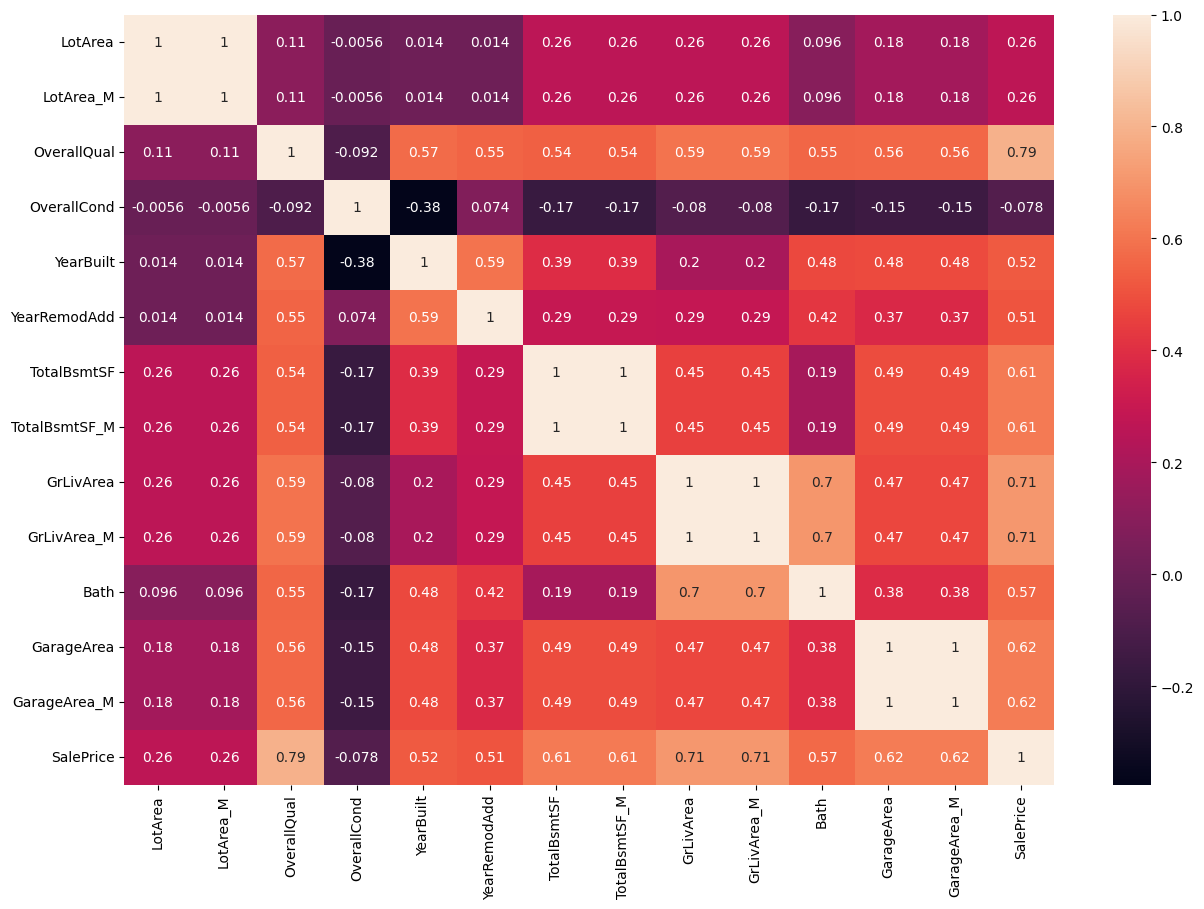

In [169]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[stats.columns].corr(), annot=True)
plt.show()

In [170]:
df.drop(
    ["GarageArea_M", "GrLivArea_M", "TotalBsmtSF_M", "LotArea_M"], axis=1, inplace=True
)
df

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,DateSold,SaleCondition,SalePrice
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,1710,3,Gd,548,2/2008,Normal,208500
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,1262,2,TA,460,5/2007,Normal,181500
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,1786,3,Gd,608,9/2008,Normal,223500
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,1717,1,Gd,642,2/2006,Abnorml,140000
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,2198,3,Gd,836,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,GasA,Ex,Y,1647,3,TA,460,8/2007,Normal,175000
1456,13175,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,GasA,TA,Y,2073,2,TA,500,2/2010,Normal,210000
1457,9042,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,GasA,Ex,Y,2340,2,Gd,252,5/2010,Normal,266500
1458,9717,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,GasA,Gd,Y,1078,1,Gd,240,4/2010,Normal,142125


3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

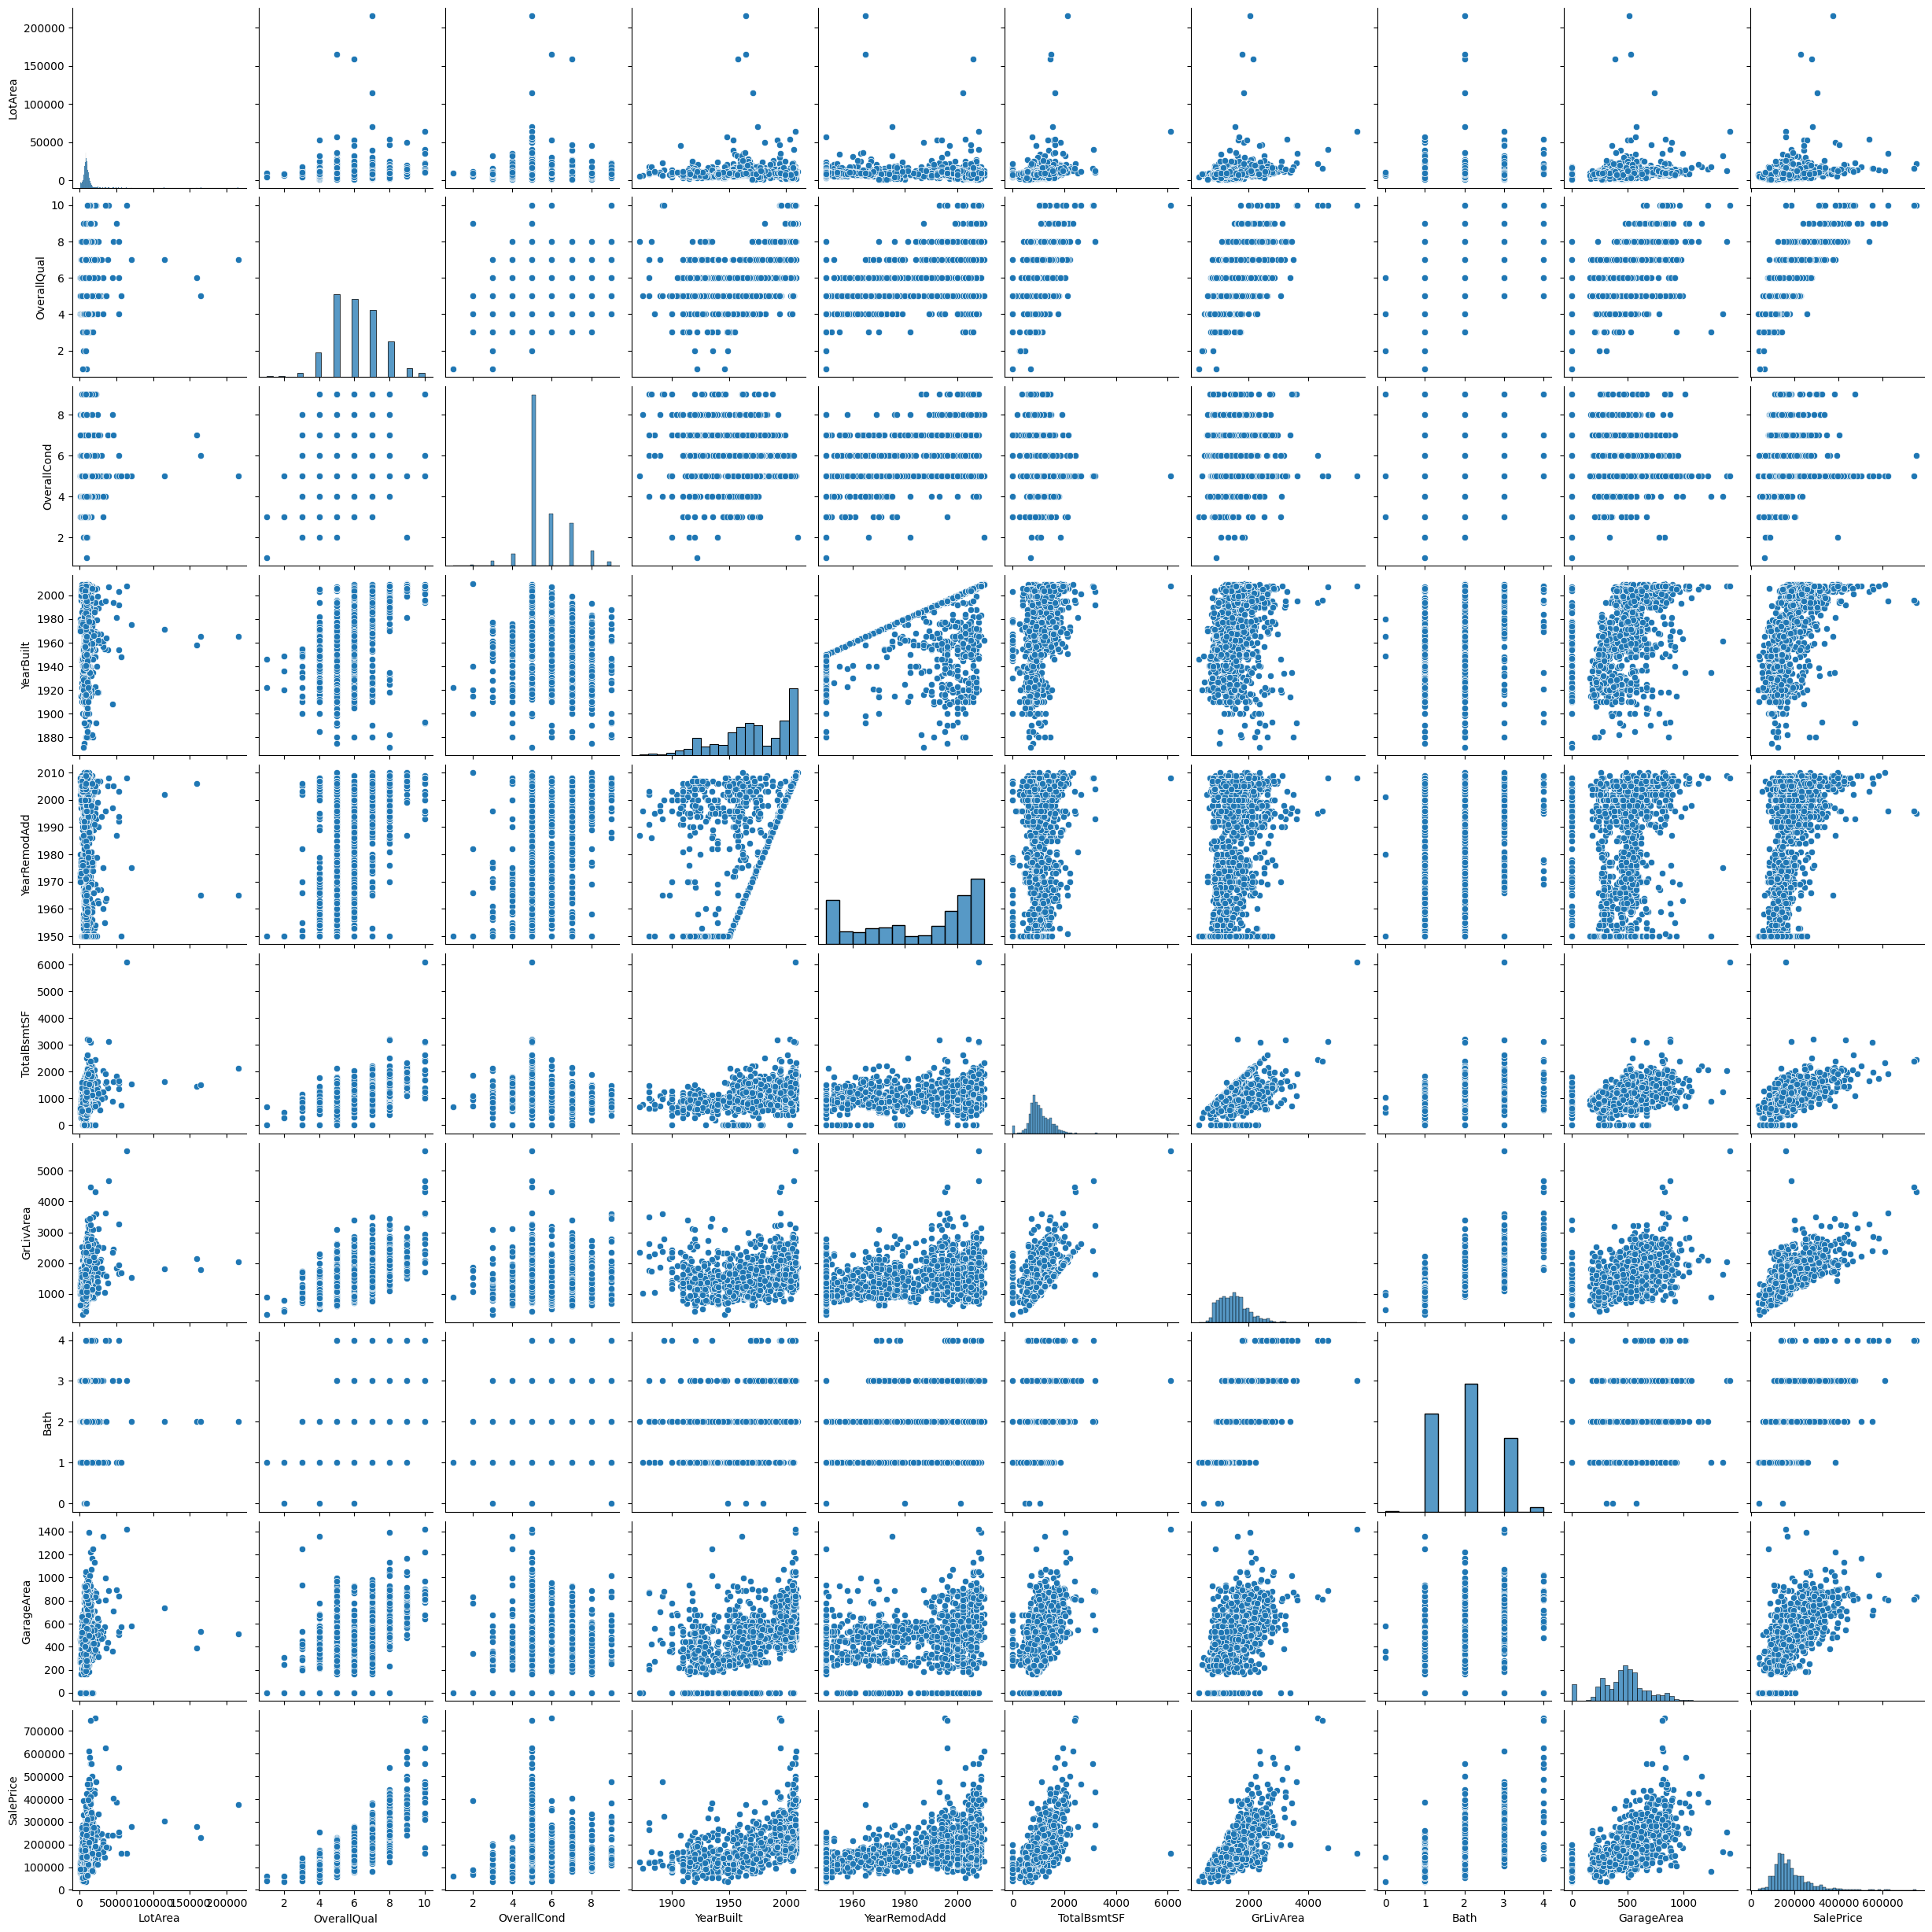

In [ ]:
sns.pairplot(df)  # Просто смотрим на зависимость и всё, лол
# А вообще, зависимость можно было проверить через Хи2 тест
plt.show()

4. Сделайте предварительные выводы.

Вывод:

Между целевой переменной и признаками существует слабая линейная связь

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [172]:
df["AreaPerBathroom"] = df["GrLivArea"] / df["Bath"].replace(0, 1)

Площадь на ванную может помочь выявить наличие доп. удобств

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [173]:
df = pd.get_dummies(df, drop_first=False)
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,856,1710,3,548,208500,...,False,False,False,False,False,False,False,False,True,False
1,9600,6,8,1976,1976,1262,1262,2,460,181500,...,False,False,False,False,False,False,False,False,True,False
2,11250,7,5,2001,2002,920,1786,3,608,223500,...,False,False,True,False,False,False,False,False,True,False
3,9550,7,5,1915,1970,756,1717,1,642,140000,...,False,False,False,False,True,False,False,False,False,False
4,14260,8,5,2000,2000,1145,2198,3,836,250000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,460,175000,...,False,False,False,False,False,False,False,False,True,False
1456,13175,6,6,1978,1988,1542,2073,2,500,210000,...,False,False,False,False,False,False,False,False,True,False
1457,9042,7,9,1941,2006,1152,2340,2,252,266500,...,False,False,False,False,False,False,False,False,True,False
1458,9717,5,6,1950,1996,1078,1078,1,240,142125,...,False,False,False,False,False,False,False,False,True,False


2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [174]:
scaler = StandardScaler()

for column in df.columns:
    df[[column]] = scaler.fit_transform(df[[column]])
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,-0.459303,0.370333,1.323851,0.351000,0.347273,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,0.466465,-0.482512,0.065503,-0.060731,0.007288,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073480,0.651479,-0.517200,0.984752,0.830215,-0.313369,0.515013,1.323851,0.631726,0.536154,...,-0.101885,-0.087129,9.213162,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.687324,0.383659,-1.192845,0.790804,-0.515281,...,-0.101885,-0.087129,-0.108540,-0.117851,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.199680,1.299326,1.323851,1.698485,0.869843,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.238122,0.250402,1.323851,-0.060731,-0.074560,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,1.104925,1.061367,0.065503,0.126420,0.366161,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,0.215641,1.569647,0.065503,-1.033914,1.077611,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.080160,-0.795151,0.381743,-0.704406,0.539493,0.046905,-0.832788,-1.192845,-1.090059,-0.488523,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [175]:
x = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state
)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [176]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [177]:
weights = linear_model.coef_
intercept = linear_model.intercept_
print(f"Model weights:\n{weights}")
print()
print(intercept)

Model weights:
[ 7.58776228e-02  2.48515063e-01  7.38535627e-02  1.53498755e-01
  7.47699776e-03  7.72033069e-02  3.39652014e-01 -4.12411153e-02
  8.99154619e-02 -3.97348388e-02 -5.23695415e+11 -5.23695415e+11
  1.05215904e+12  4.09253890e+11  5.26137011e+11  4.79971010e+11
  7.61676945e+11  1.10150495e+11  4.84527771e+11  1.01393717e+11
  4.65369135e+11  8.09957699e+10  4.33684869e+10  4.48640292e+11
  2.35908419e+11  1.14192694e+12  1.17466562e+12 -9.53090800e+10
 -2.88665179e+11 -6.31419492e+11 -5.50644772e+10 -6.88648947e+11
 -1.18065946e+12 -1.95067623e+12 -1.95500536e+12 -5.00418527e+11
 -2.51772544e+11 -1.78213641e+11 -3.17385469e+10 -1.77622708e+11
 -1.33868463e+11 -8.37994601e+10 -4.48696987e+10 -6.34117993e+10
 -1.06835947e+12 -3.84862327e+11 -7.93330642e+11 -5.59076839e+10
 -9.72759740e+11 -8.93460685e+11 -8.93460685e+11  8.44768524e+11
  5.39259261e+11  1.63935419e+12  1.67217198e+12 -2.23847498e+11
 -2.54961253e+11 -2.54961253e+11 -2.45043478e+11 -2.23847498e+11
 -3.451048

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [178]:
lasso = Lasso(random_state=random_state)

param_grid = {"alpha": np.logspace(-5, 5, 50)}

grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5
)

In [179]:
grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_["alpha"]
print(f"Лучший параметр регуляризации (alpha): {best_alpha}")

Лучший параметр регуляризации (alpha): 0.029470517025518096


In [180]:
best_lasso = Lasso(alpha=best_alpha, random_state=random_state)
best_lasso.fit(x_train, y_train)

Lasso(alpha=np.float64(0.029470517025518096), random_state=42)

In [181]:
y_train_pred = best_lasso.predict(x_train)
y_test_pred = best_lasso.predict(x_test)

print("Оценка на обучающей выборке:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"R²: {r2_score(y_train, y_train_pred):.2f}")

print()

print("Оценка на тестовой выборке:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.2f}")

Оценка на обучающей выборке:
MAE: 0.26
MSE: 0.19
R²: 0.80

Оценка на тестовой выборке:
MAE: 0.27
MSE: 0.22
R²: 0.82


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [182]:
weights = best_lasso.coef_
intercept = best_lasso.intercept_
print(f"Model weights:\n{weights}")
print()
print(intercept)

Model weights:
[ 6.35360232e-02  2.73823011e-01  2.18439315e-02  1.17645481e-01
  2.42730810e-02  6.98376356e-02  2.84327438e-01  0.00000000e+00
  9.73124033e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.87743192e-02 -0.00000000e+00 -0.00000000e+00 -1.84921590e-03
 -0.00000000e+00  0.00000000e+00 -2.17651302e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.69774815e-02
 -0.00000000e+00  0.00000000e+00 -3.60360303e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.79348920e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.51891986e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.35284775e-03  5.60629261e-18  1.17520844e-01
 -0.00000000e+00  0.00000000e+00 -2.95159686e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.000000

Регуляризация при обучении модели линейной регрессии позволила занулить большую часть коэффициентов и достигнуть минимального по длине вектора весов.

Так же, это позволило предотвратить переобучение и избавиться от не самых значимых признаков.

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [183]:
param_grid = {"alpha": np.logspace(-4, 4, 10)}
ridge = Ridge(random_state=random_state)

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_["alpha"]
print(f"Best alpha: {best_alpha}")

ridge_model = Ridge(alpha=best_alpha, random_state=random_state)
ridge_model.fit(x_train, y_train)

Best alpha: 166.81005372000558


Ridge(alpha=np.float64(166.81005372000558), random_state=42)

In [184]:
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

In [185]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train:")
print(
    f"MAE: {mae_train}\n\
      MSE: {mse_train}\n\
      R^2: {r2_train}"
)


print()


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test:")
print(
    f"MAE: {mae_test}\n\
      MSE: {mse_test}\n\
      R^2: {r2_test}"
)

Train:
MAE: 0.24791261155040265
      MSE: 0.17379948373744955
      R^2: 0.8162281261144911

Test:
MAE: 0.28247036377727663
      MSE: 0.22207834691442715
      R^2: 0.8174000498100351


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [186]:
weights = ridge_model.coef_
intercept = ridge_model.intercept_
print(f"Model weights:\n{weights}")
print()
print(intercept)

Model weights:
[ 7.41441104e-02  2.07239820e-01  5.26763128e-02  8.83722043e-02
  2.26336039e-02  1.02191651e-01  2.08440166e-01  9.00802650e-02
  9.88003349e-02  2.77033566e-02 -1.64059028e-03  1.64059028e-03
  3.76184352e-02 -2.82542733e-04 -2.86804820e-02 -3.18935596e-02
 -1.19041253e-02  1.32965380e-02 -2.47572593e-02 -5.45662254e-03
  2.34167093e-02  1.42618820e-05  4.28093732e-03  5.60867760e-02
  1.45664603e-03  2.21627886e-02 -4.32588707e-02  4.30114199e-03
  9.35942115e-04 -7.89366511e-04 -9.58967674e-04 -1.87156793e-04
 -1.49284058e-02 -1.16457128e-02  2.10869297e-02  1.42368022e-03
 -2.73612292e-04 -8.56404611e-03  5.04438903e-03 -4.59539233e-03
  1.57387964e-03 -1.22727873e-03 -1.17868357e-02  1.69868806e-02
  1.71649493e-02  9.49220290e-03 -1.92017078e-02 -3.47145621e-03
 -6.74795933e-03 -1.27119714e-02  1.27119714e-02  1.18442848e-01
 -8.77715498e-03 -9.40619476e-03 -4.77842854e-02  3.53016362e-03
 -7.88062208e-03 -3.01363363e-02  1.71759365e-02 -1.10779197e-02
 -1.470831

В отличии от $L_1$ регуляризации, $L_2$ позволила снизить все признаки не обращая их в 0.

Это может быть полезно в случае, когда все признаки несут полезную информацию.

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [187]:
coefficients = ridge_model.coef_
feature_names = x_train.columns

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

positive_coefs = coef_df[coef_df["Coefficient"] > 0].sort_values(
    by="Coefficient", ascending=False
)

top_positive_features = positive_coefs.head(3)
print(top_positive_features)

           Feature  Coefficient
6        GrLivArea     0.208440
1      OverallQual     0.207240
51  KitchenQual_Ex     0.118443


При прочих равных рост этих показателей, вероятно, приведет к росту суммы сделки

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [188]:
coefficients = ridge_model.coef_
feature_names = x_train.columns

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
negative_coefs = coef_df[coef_df["Coefficient"] < 0].sort_values(by="Coefficient")

top_negative_features = negative_coefs.head(3)
print(top_negative_features)

           Feature  Coefficient
54  KitchenQual_TA    -0.047784
26    ExterQual_TA    -0.043259
15  BldgType_Twnhs    -0.031894


При прочих равных рост этих показателей, вероятно, приведет к снижению суммы сделки

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [189]:
coefficients = best_lasso.coef_
feature_names = x_train.columns

zero_coefs = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
zero_features = zero_coefs[zero_coefs["Coefficient"] == 0].head(3)

print(zero_features)

            Feature  Coefficient
7              Bath          0.0
9   AreaPerBathroom         -0.0
10      Street_Grvl         -0.0


Модель Lasso зануляет признаки, которые несут меньше информации относительно остальных.

Поэтому наверняка утверждать, что от них не зависит цена сделки нельзя. 

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 